Data Story for Savings Data


In [1]:
import pandas as pd
import plotly.express as px

In [2]:
from google.colab import files
data=files.upload()

Saving savings_data_final.csv to savings_data_final.csv


In [3]:
df=pd.read_csv("savings_data_final.csv")
fig=px.scatter(df,y="quant_saved",color="rem_any").show()

In [4]:
import csv
import plotly.graph_objects as go

with open('savings_data_final.csv',newline="")as f:
  reader=csv.reader(f)
  savings_data=list(reader)

savings_data.pop(0)

total_entries=len(savings_data)
total_people_reminder=0
for data in savings_data:
  if int(data[3]) == 1:
    total_people_reminder+=1
fig=go.Figure(go.Bar(x=["REMINDED","NOT REMINDED"],y=[total_people_reminder,(total_entries-total_people_reminder)]))
fig.show()

In [5]:
import statistics

all_savings=[]

for data in savings_data:
  all_savings.append(float(data[0]))

print(f"Mean of Savings: {statistics.mean(all_savings)}")
print(f"Median of Savings: {statistics.median(all_savings)}")
print(f"Mode of Savings: {statistics.mode(all_savings)}")

Mean of Savings: 85.32780331328739
Median of Savings: 39.2724
Mode of Savings: 0.0


In [6]:
reminded_savings=[]
not_reminded_savings=[]

for data in savings_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))

print("Results for people Reminded")
print(f"Mean of Savings: {statistics.mean(reminded_savings)}")
print(f"Median of Savings: {statistics.median(reminded_savings)}")
print(f"Mode of Savings: {statistics.mode(reminded_savings)}")

print("\n\n")
print("Results for people Not Reminded")
print(f"Mean of Savings: {statistics.mean(not_reminded_savings)}")
print(f"Median of Savings: {statistics.median(not_reminded_savings)}")
print(f"Mode of Savings: {statistics.mode(not_reminded_savings)}")

Results for people Reminded
Mean of Savings: 82.56940908263547
Median of Savings: 39.2724
Mode of Savings: 0.0



Results for people Not Reminded
Mean of Savings: 89.67095185226523
Median of Savings: 36.0475
Mode of Savings: 0.0


In [7]:

print(f"Std dev of All Savings: {statistics.stdev(all_savings)}")
print(f"Std dev of Reminded Savings: {statistics.stdev(reminded_savings)}")
print(f"Std dev of Not Reminded Savings: {statistics.stdev(not_reminded_savings)}")

Std dev of All Savings: 196.75453011909315
Std dev of Reminded Savings: 173.24866414440817
Std dev of Not Reminded Savings: 228.875050299707


In [8]:
import numpy as np

age=[]
savings=[]

for data in savings_data:
  if float(data[5]) != 0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation=np.corrcoef(age,savings)

print(f'Correlation between Age and Savings is: {correlation[0,1]}')

Correlation between Age and Savings is: 0.03663447975985462


In [9]:
import plotly.figure_factory as ff

fig=ff.create_distplot([df["quant_saved"].tolist()],["Savings"],show_hist=False)
fig.show()

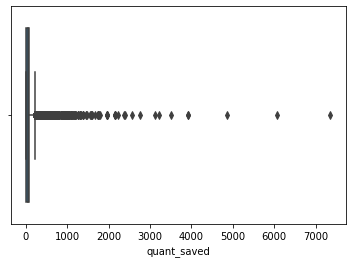

In [10]:
import seaborn as sns

sns.boxplot(data=df,x=df["quant_saved"])

In [11]:
q1=df["quant_saved"].quantile(0.25)
q3=df["quant_saved"].quantile(0.75)

iqr=q3-q1
lower_whisker=q1-1.5*iqr
upper_whisker=q3+1.5*iqr

print(f"q1-{q1}")
print(f"q3-{q3}")
print(f"iqr-{iqr}")
print(f"Lower-Whisker-{lower_whisker}")
print(f"Upper_Whisker-{upper_whisker}")

q1-2.284
q3-86.514
iqr-84.22999999999999
Lower-Whisker--124.06099999999998
Upper_Whisker-212.85899999999998


In [12]:
new_df=df[df['quant_saved']<upper_whisker]

In [13]:
all_savings=new_df["quant_saved"].tolist()

print(f"Mean of Savings: {statistics.mean(all_savings)}")
print(f"Median of Savings: {statistics.median(all_savings)}")
print(f"Mode of Savings: {statistics.mode(all_savings)}")
print(f"Std dev of All Savings: {statistics.stdev(all_savings)}")

fig=ff.create_distplot([new_df["quant_saved"].tolist()],["Savings"],show_hist=False)
fig.show()

Mean of Savings: 46.20051938981879
Median of Savings: 36.0475
Mode of Savings: 0.0
Std dev of All Savings: 50.86687191728863


In [14]:
import random 

sampling_mean_list=[]
for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling=statistics.mean(sampling_mean_list)

fig=ff.create_distplot([sampling_mean_list],["Savings (Sampling)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.08],mode="lines",name="Mean"))
fig.show()

In [15]:
print(f"Standard Deviation of Population Data: {statistics.stdev(all_savings)}")
print(f"Mean of Population Data:{statistics.mean(all_savings)}")
print(f"Standard Deviation of Sampling Data: {statistics.stdev(sampling_mean_list)}")
print(f"Mean of Sampling Data:{mean_sampling}")

Standard Deviation of Population Data: 50.86687191728863
Mean of Population Data:46.20051938981879
Standard Deviation of Sampling Data: 5.11344404422777
Mean of Sampling Data:46.24851356634459


In [16]:
temp_df=new_df[new_df.age!=0]

age=temp_df["age"].tolist()
savings=temp_df["quant_saved"].tolist()

correlation=np.corrcoef(age,savings)

print(f'Correlation between Age and Savings is: {correlation[0,1]}')

Correlation between Age and Savings is: 0.08561544120342092


In [17]:
reminder_df=new_df.loc[new_df["rem_any"]==1]
not_reminder_df=new_df.loc[new_df["rem_any"]==0]

print(reminder_df.head())
print(not_reminder_df.head())

fig=ff.create_distplot([not_reminder_df["quant_saved"]],["Savings (Not Reminded)"],show_hist=False)
fig.show()

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [19]:
not_reminded_savings=not_reminder_df["quant_saved"].tolist()
sampling_mean_list_not_reminded=[]

for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded=statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded=statistics.stdev(sampling_mean_list_not_reminded)

fig=ff.create_distplot([sampling_mean_list_not_reminded],["Savings (Sampling)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.08],mode="lines",name="Mean"))
fig.show()

In [21]:
first_stdev_start=mean_sampling_not_reminded-stdev_sampling_not_reminded
first_stdev_end=mean_sampling_not_reminded+stdev_sampling_not_reminded

second_stdev_start=mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_stdev_end=mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)

third_stdev_start=mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_stdev_end=mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)

print(f"First(Start)-{first_stdev_start} First(End)-{first_stdev_end}")
print(f"Second(Start)-{second_stdev_start} Second(End)-{second_stdev_end}")
print(f"Third(Start)-{third_stdev_start} Third(End)-{third_stdev_end}")

First(Start)-38.45307891610669 First(End)-48.53481995430475
Second(Start)-33.41220839700767 Second(End)-53.575690473403775
Third(Start)-28.37133787790864 Third(End)-58.6165609925028


In [22]:
reminded_savings=reminder_df["quant_saved"].tolist()
sampling_mean_list_reminded=[]

for i in range(1000):
  temp_list=[]
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded=statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded=statistics.stdev(sampling_mean_list_reminded)

fig=ff.create_distplot([sampling_mean_list_reminded],["Savings (Sampling Reminded)"],show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling],y=[0,0.08],mode="lines",name="Mean"))
fig.show()

In [23]:
z_score=(mean_sampling_reminded-mean_sampling_not_reminded)/stdev_sampling_not_reminded
print(f"Z Score={z_score}")

Z Score=0.8514526855634759
